<a href="https://colab.research.google.com/github/HC-JEONG/Introduction_to_Machine_Learning_with_Python/blob/master/Ch2.3.2%20k-NN(k-Nearset%20Neighbors).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2.3.2 k-최근접 이웃

> k-NN(k-Nearset Neighbors) 알고리즘은 가장 간단한 머신러닝 알고리즘이다. training set을 그냥 저장하는 것이 모델을 만드는 과정의 전부다. 새로운 데이터 개체에 대해 예측할 땐 알고리즘이 training set에서 가장 가까운 데이터 포인트, 즉 '최근접 이웃'을 찾는다.


**k-최근접 이웃 분류**

forge dataset을 최근접 이웃으로 분류한 것이다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager as fm
from matplotlib import rc
%matplotlib inline
import pandas as pd
!pip install mglearn
import mglearn
import scipy as sp
import sklearn
import graphviz
from IPython.display import display
from sklearn.pipeline import make_pipeline
from google.colab import files
import io

!apt-get update -qq
!apt-get install fonts-nanum* -qq
sys_font=fm.findSystemFonts()
nanum_font = [f for f in sys_font if 'Nanum' in f]
nanum_font
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'

font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

plt.rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False

fm._rebuild()

     |████████████████████████████████| 542kB 2.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=edf1cbe402543c3dcc58304277f49cca8ac137d736323c84bd8c57f81d715aeb
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Selecting previously unselected package fonts-nanum.
(Reading database ... 131183 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
NanumGothic Eco


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


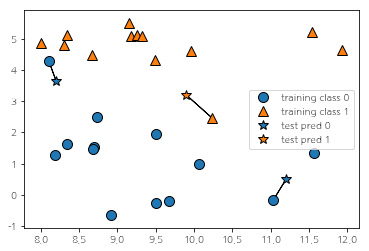

In [2]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


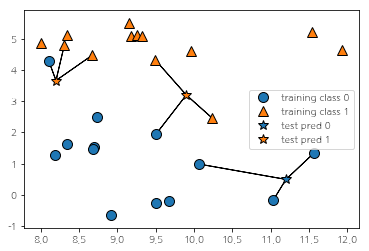

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

마찬가지로 예측은 연결된 개체의 색으로 나타난다. 새 데이터 포인트 중 왼쪽 위의 것은 이웃을 하나만 사용했을 때와 예측이 달라졌다.

> 일반화 성능을 평가할 수 있도록 데이터를 training set과 test set으로 나눈다.

In [4]:
# forge data split

from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


KNeighborsClassifier를 import하고 객체를 만든다. 이때 이웃의 수 같은 매개변수들을 지정한다.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3) #이웃의 수를 3으로 지정

In [6]:
# 훈련 세트로 학습시키기
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

test set에 대해 predict 메서드를 호출해서 예측한다.

In [8]:
print("테스트 세트 예측:", clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


> 모델이 얼마나 잘 일반화되었는지 평가하기 위해 score 메서드에 test set과 test label을 넣어 호출한다.

In [9]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


**KNeighborsClassifier 분석**

> forge dataset은 2차원이므로 가능한 모든 테스트 포인트의 예측을 xy 평면에 그려볼 수 있다. 각 개체가 속한 클래스에 따라 평면에 색을 칠하면 결정 경계(decision boundary)를 볼 수 있다.

다음 코드는 이웃이 하나, 셋, 아홉 개일 때의 결정 경계를 보여준다.

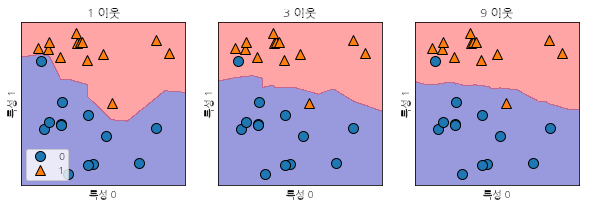

In [10]:
fig, axes=plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

> 이웃의 수를 늘릴수록 결정 경계는 더욱 부드러워진다. 부드러운 경계는 더 단순한 모델을 의미한다. 즉 이웃을 적게 사용하면 모델의 복잡도가 높아지고, 많이 사용하면 복잡도는 낮아진다.

실제 데이터인 유방암 데이터셋을 사용해서 모델의 복잡도와 일반화 사이의 관계를 살펴본다. data split을 한 후 k 값을 바꾸며 training set과 test set의 성능을 평가한다.

> 이웃의 수를 늘릴수록 결정 경계는 더욱 부드러워진다. 부드러운 경계는 더 단순한 모델을 의미한다. 즉 이웃을 적게 사용하면 모델의 복잡도가 높아지고, 많이 사용하면 복잡도는 낮아진다.

실제 데이터인 유방암 데이터셋을 사용해서 모델의 복잡도와 일반화 사이의 관계를 살펴본다. data split을 한 후 k 값을 바꾸며 training set과 test set의 성능을 평가한다.

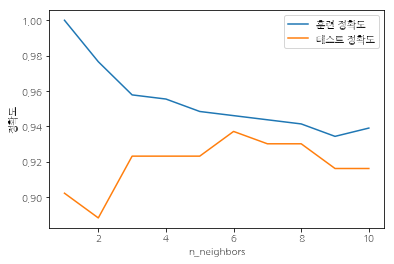

In [11]:
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy=[]
test_accuracy=[]
# 1 에서 10 까지 n_neighbors를 적용
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    # 모델 생성
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

> n_nighbors 수에 따른 training set과 test set 정확도를 보여준다. k=1일 때 training set에 대한 예측은 완벽하다. 그러나 이웃의 수가 늘어나면 모델은 단순해지고 training set의 정확도는 줄어든다. 이웃을 하나 사용한 테스트 세트의 정확도는 이웃을 많이 사용했을 때보다 낮다. 반대로 이웃을 10개 사용했을 때는 모델이 너무 단순해서 정확도는 더 나빠진다. 정확도가 가장 좋을 때는 중간 정도인 여섯 개를 사용한 경우다.

**k-최근접 이웃 회귀**
> k-NN은 회귀 분석에도 쓰인다.

이번에는 wave dataset을 이용해서 k-NN 회귀분석을 한 것이다.

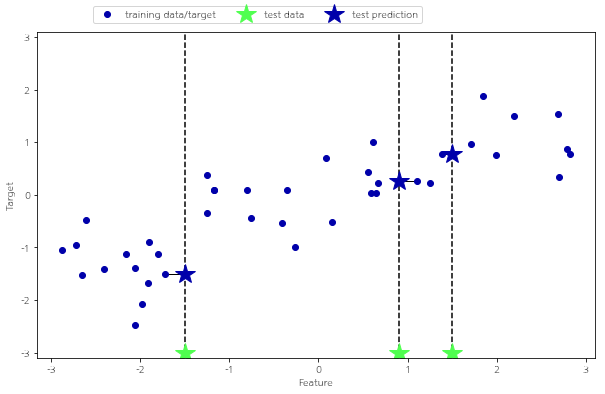

In [12]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

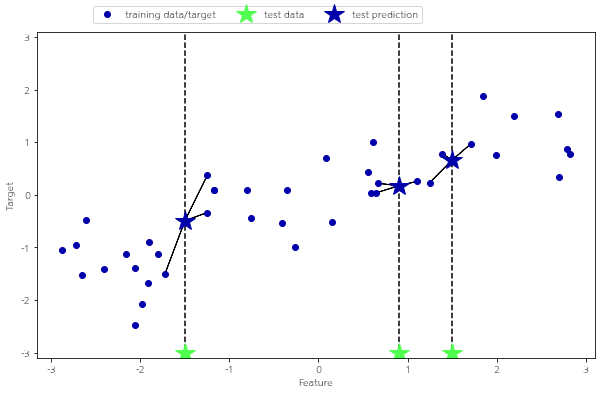

In [13]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

> 여러 개의 최근접 이웃을 사용할 땐 이웃 간의 평균이 예측된다.


scikit-learn에서 회귀를 위한 k-nn 알고리즘은 KNeighborsRegressor에 구현되어 있다.


In [14]:
from sklearn.neighbors import KNeighborsRegressor

X,y=mglearn.datasets.make_wave(n_samples=40)

# wave 데이터 셋을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다.
reg=KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

> test set에 대해 예측한다.

In [15]:
print("테스트 세트 예측:\n", reg.predict(X_test))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


> score 메서드를 사용해 모델을 평가하고, 회귀일 땐 R^2 값을 반환한다.

In [16]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


**KNeighborsRegressor 분석**



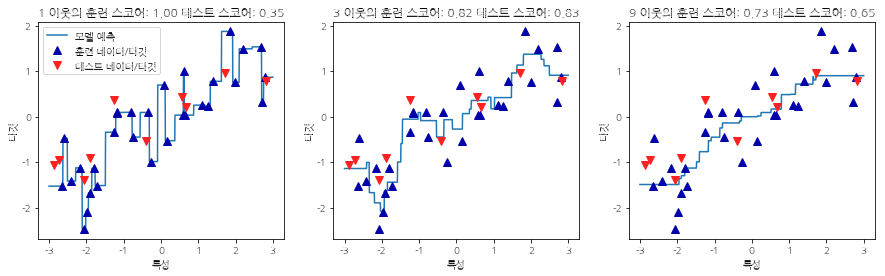

In [17]:
fig, axes=plt.subplots(1,3, figsize=(15,4))
# -3과 3사이에 1000개의 데이터 포인트를 만듭니다
line=np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
    #1, 3, 9 이웃을 사용한 예측을 합니다
    reg=KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
    "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train),
        reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃",
                "테스트 데이터/타깃"], loc="best")

> k=1일 때 training set의 개체가 예측에 주는 영향이 커서 예측값이 training set의 개체를 모두 지나간다. 이는 매우 불안정한 예측을 만들어 낸다. 이웃을 많이 사용하면 training set에는 잘 안맞을 수 있지만 더 안정된 예측을 얻게 된다.

**장단점과 매개변수**

일반적으로 KNeighbors 분류기에 중요한 매개변수는 두 가지가 있다.


*   개체 사이의 거리를 재는 방법
*   이웃의 수

> 이웃의 수는 3개나 5개 정도로 적을 때 잘 작동한다. 거리 재는 방법은 유클리디안 거리 방식을 이용한다.

k-NN을 사용할 땐 데이터를 전처리하는 과정이 중요하다(이웃 간의 거리를 계산할 때 특성마다 값의 범위가 다르면 범위가 작은 특성에 크게 영향을 받으므로 같은 스케일을 같도록 정규화 해주는 것이 일반적이다).



*   많은 특성을 가진 data set에는 잘 작동하지 않는다
*   특성 값 대부분이 0인 dataset과는 특히 잘 작동하지 않는다.



